In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Метод обучения. Похож на нейроные сети
#В большенстве моделей функция fit - обучает, predict - предсказывает.
from sklearn.linear_model import Perceptron

In [3]:
#Метрика для подсчета доли верных отыветов
from sklearn.metrics import accuracy_score

In [4]:
#Переводит все признаки в один масштаб (Стандартная Нормализация)
#Функция fit_transform находит дисперсию и среднюю и по ним стандартезирует
#Функция transform стандартезирует уже по известным параметрам средней и дисперсии(меньше времени)
from sklearn.preprocessing import StandardScaler

In [3]:
train = pd.read_csv('perceptron-train.csv',header=None)

In [4]:
test = pd.read_csv('perceptron-test.csv',header=None)

In [5]:
y_train = train.iloc[:,0]
x_train = train.iloc[:,1:]

y_test = test.iloc[:,0]
x_test = test.iloc[:,1:]

In [17]:
scaler = StandardScaler()#Создаем скаляр

In [18]:
x_train_scaled = scaler.fit_transform(x_train) #Масштабируем данные
x_test_scaled = scaler.transform(x_test)

In [19]:
pers = Perceptron(random_state=241) #Создаем персептрон

In [20]:
pers.fit(x_train,y_train)#Обучаем на не склярных данных
pred_not_scale = pers.predict(x_test) #Предсказываем

In [21]:
#Подсчитываем долю правильно предсказанных ответов
acc_not_scale = accuracy_score(y_pred=pred_not_scale, y_true=y_test)

In [22]:
print acc_not_scale

0.655


In [25]:
#Обучаем перспектрон на стандартезиврованных данных
pers.fit(x_train_scaled,y_train)
pred_scaled = pers.predict(x_test_scaled)

In [26]:
#Доля на станд. ответов
acc_scaled = accuracy_score(y_pred=pred_scaled,y_true=y_test)

In [27]:
print acc_scaled

0.845


In [29]:
#Разница между долями... На сколько лучше обучение на станд. даннных
diff = acc_scaled - acc_not_scale

In [30]:
print diff

0.19


In [31]:
import os

In [36]:
os.chdir('D:\Leon Projects\Python')

In [37]:
txt = open('sub3.txt','w')
txt.write('%0.3f' % diff)
txt.close()

In [6]:
m,n = x_train.shape

In [24]:
tr =  np.where([y_train > 0])[1]

In [26]:
fl =  np.where([y_train < 0])[1]

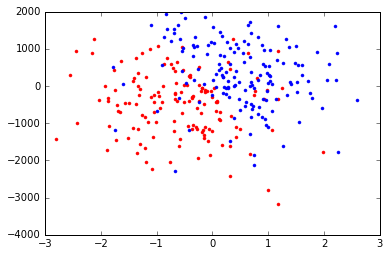

In [35]:
plt.plot(x_train.iloc[tr,0],x_train.iloc[tr,1],'.r',x_train.iloc[fl,0],x_train.iloc[fl,1],'.b')